## Training Basic CNN for CIFAR10 Dataset

In [5]:
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from torchsummary import summary

from data.dataloader import get_cifar10_loaders
from models.simple_cnn import SimpleCNN
from trainer.train import train
from trainer.evaluate import evaluate
from utils.helpers import set_seed
from inference.predict import load_image, predict_image


### Load Configuration and Set Seed

In [6]:
# Load config
with open("config/config.yaml") as f:
    cfg = yaml.safe_load(f)

set_seed(cfg["training"]["seed"])


### Training the model

In [7]:
trainloader, testloader = get_cifar10_loaders(cfg["training"]["batch_size"])

# Initialize model 
model = SimpleCNN()

In [ ]:
# Train the model
train_losses, train_accuracies = train(model, trainloader, cfg["training"])

Epoch 1/20: 100%|██████████| 782/782 [00:09<00:00, 84.29it/s]


Epoch [1], Loss: 1.6608, Accuracy: 38.99%


Epoch 2/20: 100%|██████████| 782/782 [00:08<00:00, 89.27it/s]


Epoch [2], Loss: 1.3130, Accuracy: 51.77%


Epoch 3/20: 100%|██████████| 782/782 [00:08<00:00, 90.06it/s]


Epoch [3], Loss: 1.1832, Accuracy: 56.77%


Epoch 4/20: 100%|██████████| 782/782 [00:08<00:00, 90.09it/s]


Epoch [4], Loss: 1.0995, Accuracy: 59.89%


Epoch 5/20: 100%|██████████| 782/782 [00:08<00:00, 89.94it/s]


Epoch [5], Loss: 1.0414, Accuracy: 61.83%


Epoch 6/20: 100%|██████████| 782/782 [00:08<00:00, 91.67it/s]


Epoch [6], Loss: 0.9909, Accuracy: 63.97%


Epoch 7/20: 100%|██████████| 782/782 [00:08<00:00, 92.27it/s]


Epoch [7], Loss: 0.9367, Accuracy: 65.63%


Epoch 8/20: 100%|██████████| 782/782 [00:08<00:00, 91.24it/s]


Epoch [8], Loss: 0.8868, Accuracy: 67.27%


Epoch 9/20: 100%|██████████| 782/782 [00:08<00:00, 92.50it/s]


Epoch [9], Loss: 0.8567, Accuracy: 68.24%


Epoch 10/20: 100%|██████████| 782/782 [00:08<00:00, 92.60it/s]


Epoch [10], Loss: 0.8067, Accuracy: 70.11%


Epoch 11/20: 100%|██████████| 782/782 [00:08<00:00, 92.39it/s]


Epoch [11], Loss: 0.7788, Accuracy: 70.97%


Epoch 12/20: 100%|██████████| 782/782 [00:08<00:00, 91.61it/s]


Epoch [12], Loss: 0.7384, Accuracy: 72.51%


Epoch 13/20: 100%|██████████| 782/782 [00:08<00:00, 92.54it/s]


Epoch [13], Loss: 0.7097, Accuracy: 73.29%


Epoch 14/20: 100%|██████████| 782/782 [00:08<00:00, 91.82it/s]


Epoch [14], Loss: 0.6749, Accuracy: 74.84%


Epoch 15/20: 100%|██████████| 782/782 [00:08<00:00, 91.00it/s]


Epoch [15], Loss: 0.6414, Accuracy: 76.04%


Epoch 16/20: 100%|██████████| 782/782 [00:08<00:00, 92.16it/s]


Epoch [16], Loss: 0.6248, Accuracy: 76.45%


Epoch 17/20: 100%|██████████| 782/782 [00:08<00:00, 92.62it/s]


Epoch [17], Loss: 0.5881, Accuracy: 77.81%


Epoch 18/20: 100%|██████████| 782/782 [00:08<00:00, 92.55it/s]


Epoch [18], Loss: 0.5683, Accuracy: 78.40%


Epoch 19/20: 100%|██████████| 782/782 [00:08<00:00, 92.01it/s]


Epoch [19], Loss: 0.5465, Accuracy: 79.12%


Epoch 20/20: 100%|██████████| 782/782 [00:08<00:00, 92.29it/s]

Epoch [20], Loss: 0.5344, Accuracy: 79.53%


## Evaluating the model

In [4]:
# Evaluate
y_true, y_pred, test_acc = evaluate(model, testloader)


Accuracy: 79.05%


### Visualizing the loss and accuracy.

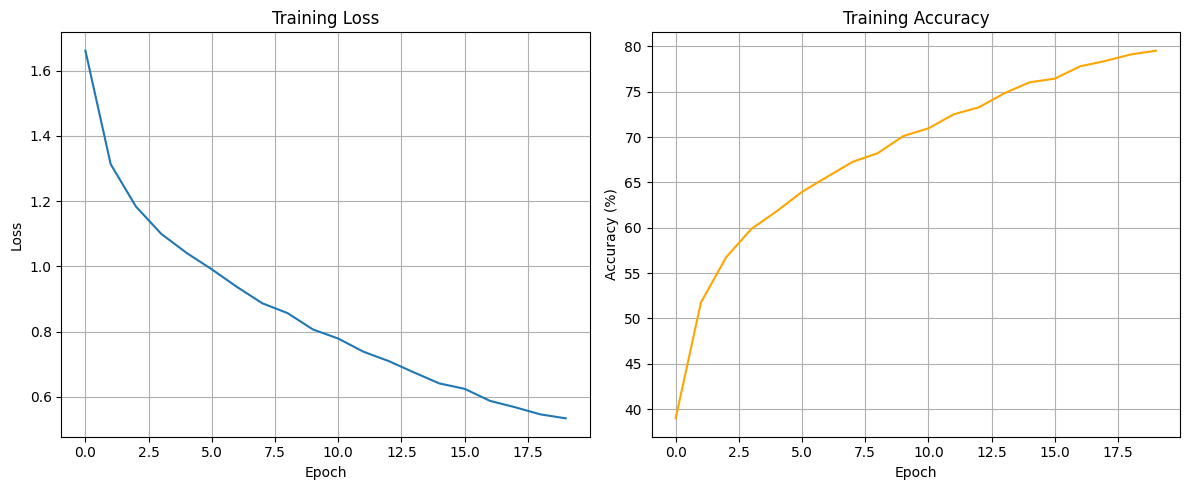

In [5]:
# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy', color='orange')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid()

plt.tight_layout()
plt.show()



### Confusion Matrix

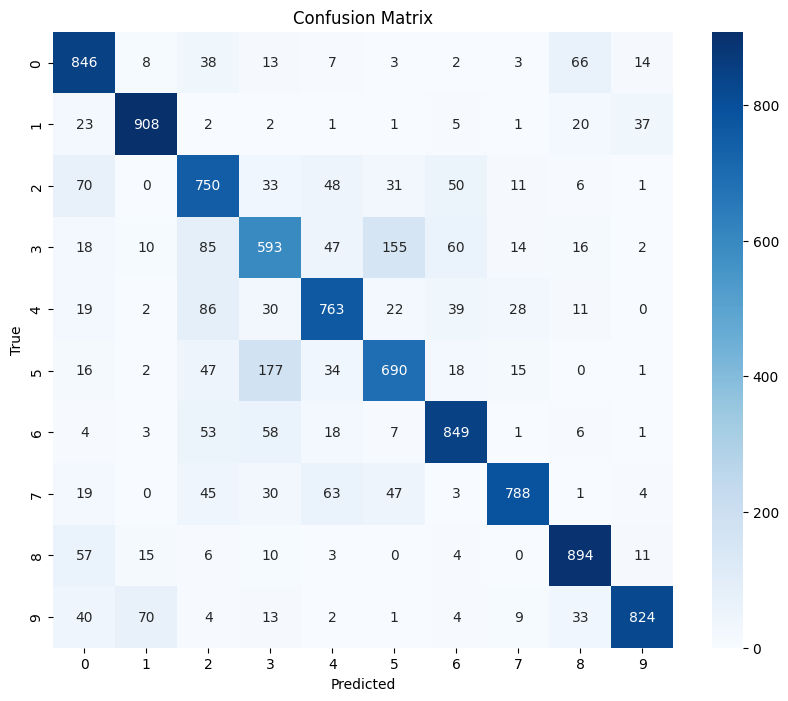

Classification Report:
              precision    recall  f1-score   support

           0     0.7608    0.8460    0.8011      1000
           1     0.8919    0.9080    0.8999      1000
           2     0.6720    0.7500    0.7089      1000
           3     0.6184    0.5930    0.6054      1000
           4     0.7738    0.7630    0.7684      1000
           5     0.7210    0.6900    0.7052      1000
           6     0.8211    0.8490    0.8348      1000
           7     0.9057    0.7880    0.8428      1000
           8     0.8490    0.8940    0.8709      1000
           9     0.9207    0.8240    0.8697      1000

    accuracy                         0.7905     10000
   macro avg     0.7934    0.7905    0.7907     10000
weighted avg     0.7934    0.7905    0.7907     10000



In [6]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

### Testing our model

In [7]:
# CIFAR-10 class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
# Load image and convert to tensor
image_path = "cifar10_sample_images/img_0_label_3.png"  
img_tensor = load_image(image_path)

Predicted class: cat


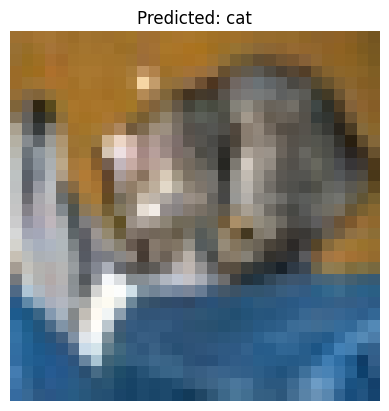

In [ ]:
# Predict
pred_index = predict_image(model, img_tensor)
print(f"Predicted class: {classes[pred_index]}")

# Display image
img_show = Image.open(image_path)
plt.imshow(img_show)
plt.title(f"Predicted: {classes[pred_index]}")
plt.axis('off')
plt.show()
